<a href="https://colab.research.google.com/github/elli-saberi/Amazon-reviews-sentiment-analysis/blob/eda/3_Top_Reviewers_by_Votes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find the top 10 reviewers with the highest total sum of useful votes ('vote') across all their reviews.


set up cell





In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading and Exploration




In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
train_path = '/content/drive/My Drive/sentiment analysis-ph2p1/train_data.csv'

train_df = pd.read_csv(train_path)

/tmp/ipython-input-669623192.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path)


Get a sneak peek of data

In [27]:
train_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


Let's have a look on the columns and their data types using detailed info function

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [29]:
train_df.isnull().sum()

,0
overall,0
vote,647476
verified,0
reviewTime,0
reviewerID,0
asin,0
style,348331
reviewerName,227
reviewText,0
summary,76


In [30]:
print(train_df.shape)

(838944, 11)


 Finding the non-numeric culprits in the 'vote' column

In [31]:
# Get all unique values from the column.
all_unique_votes = train_df['vote'].unique()

non_numeric_votes = []

# Loop through each unique value to check its type.
for vote in all_unique_votes:
    if isinstance(vote, str):
        non_numeric_votes.append(vote)

# Now, print the results of our investigation.
if non_numeric_votes:
    print("Found the following non-numeric (string) values in the 'vote' column:")
    print(non_numeric_votes)
else:
    print("No non-numeric string values were found. The issue might be related to another data type.")


Found the following non-numeric (string) values in the 'vote' column:
['3.0', '2.0', '4.0', '17.0', '340.0', '8.0', '5.0', '14.0', '11.0', '29.0', '19.0', '7.0', '6.0', '28.0', '301.0', '18.0', '10.0', '9.0', '37.0', '20.0', '12.0', '331.0', '41.0', '33.0', '38.0', '13.0', '24.0', '16.0', '21.0', '35.0', '60.0', '48.0', '106.0', '25.0', '32.0', '47.0', '114.0', '69.0', '23.0', '58.0', '15.0', '157.0', '44.0', '61.0', '81.0', '34.0', '27.0', '50.0', '26.0', '22.0', '30.0', '51.0', '67.0', '93.0', '101.0', '84.0', '154.0', '31.0', '36.0', '171.0', '40.0', '57.0', '56.0', '43.0', '68.0', '66.0', '327.0', '91.0', '104.0', '39.0', '53.0', '92.0', '125.0', '64.0', '158.0', '94.0', '119.0', '72.0', '128.0', '103.0', '45.0', '110.0', '529.0', '78.0', '444.0', '62.0', '85.0', '76.0', '74.0', '80.0', '100.0', '42.0', '96.0', '65.0', '107.0', '148.0', '73.0', '49.0', '142.0', '263.0', '54.0', '86.0', '161.0', '46.0', '116.0', '133.0', '105.0', '83.0', '281.0', '201.0', '130.0', '63.0', '137.0', '

The Ultimate Cleaning Code for the 'vote' column

In [32]:
# Step 1: Replace commas.
train_df['vote'] = train_df['vote'].str.replace(',', '', regex=False)

# Step 2: Convert to numeric.
train_df['vote'] = pd.to_numeric(train_df['vote'], errors='coerce')

# Step 3: Fill NaN values.
# fill them with 0 because a missing vote means 0 helpfulness votes.
train_df['vote'] = train_df['vote'].fillna(0)

# Step 4: Convert to integer.
train_df['vote'] = train_df['vote'].astype(int)

# Verification Step
print("--- After Cleaning ---")
print(f"New data type of 'vote' column: {train_df['vote'].dtype}")
print(f"Number of null values in 'vote' column: {train_df['vote'].isnull().sum()}")


--- After Cleaning ---
New data type of 'vote' column: int64
Number of null values in 'vote' column: 0


Analysis (Group, Aggregate, and Sort)

In [33]:
# Find the top 10 reviewers based on the total sum of their 'vote' counts.
top_10_reviewers = (
    train_df.groupby(['reviewerID', 'reviewerName'])['vote']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='total_votes')
)

print("Top 10 Reviewers by Total Helpfulness Votes:")
print(top_10_reviewers)

Top 10 Reviewers by Total Helpfulness Votes:
       reviewerID   reviewerName  total_votes
0  A25GROL6KJV3QG   Benson Leung         4345
1  A3KJ0DF3LTNJ6X     Voltron00x         3096
2  A1KPFZCS71QKW5         nycebo         2978
3    ADLVFFE4VBT8        Cthulhu         2605
4   AMYCUX8EWEUVV       Mayra S.         2605
5  A2IK776FY6MEMG        Obi Wan         2177
6  A1GHPJB2N0D0RL    Chris Upton         2167
7   AW7UMXXJKFSNS       Sally B.         1912
8  A2VQ0V1TWXF3U7  Mark A. Baker         1820
9   A7HWU6R6UQIX6    avirtualcfo         1560


Plot the result



/tmp/ipython-input-675223874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='total_votes', y='reviewerName', data=top_10_reviewers, palette='viridis')


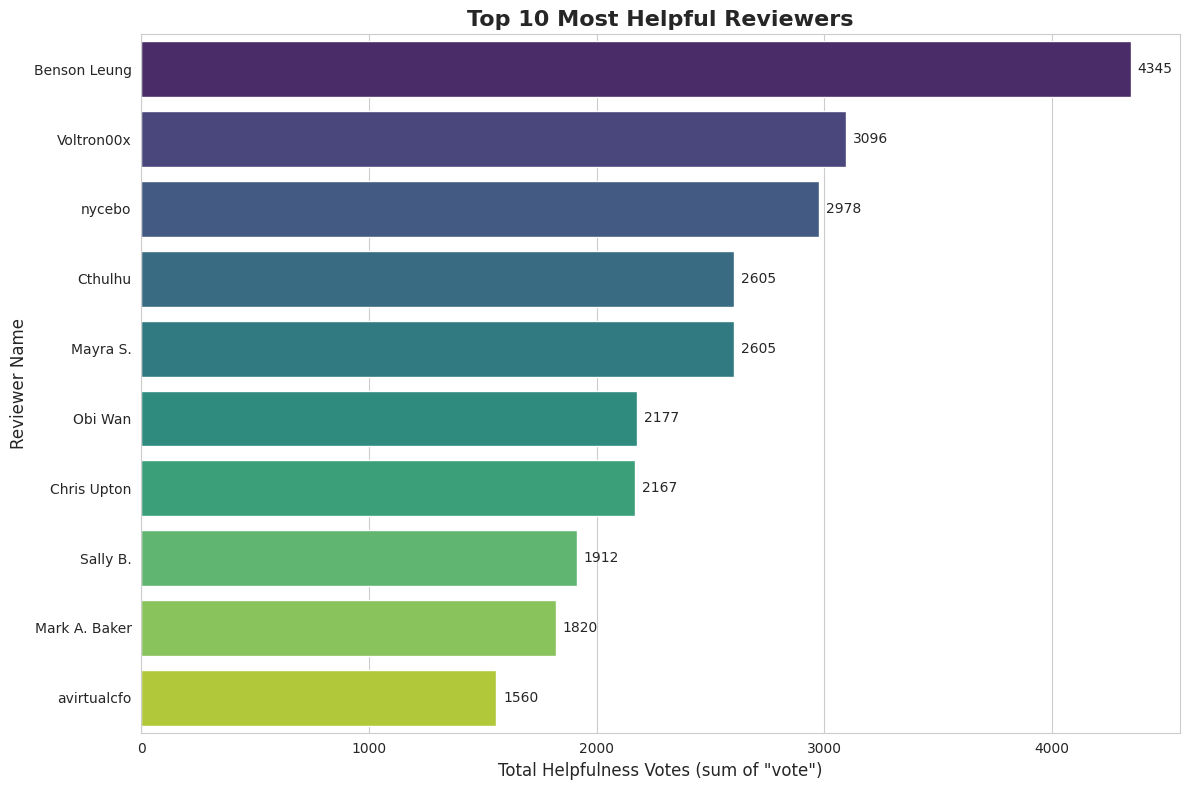

In [34]:
sns.set_style("whitegrid")

# Create a figure and axes for the plot.
plt.figure(figsize=(12, 8))

barplot = sns.barplot(x='total_votes', y='reviewerName', data=top_10_reviewers, palette='viridis')

plt.title('Top 10 Most Helpful Reviewers', fontsize=16, fontweight='bold')
plt.xlabel('Total Helpfulness Votes (sum of "vote")', fontsize=12)
plt.ylabel('Reviewer Name', fontsize=12)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', padding=5)

plt.tight_layout()

# Display the plot
plt.show()
